In [65]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt
import scipy.special
from matplotlib import rcParams
# Para aumentar la resolución de los gráficos de Matplot
import matplotlib_inline  # .py
#matplotlib_inline.backend_inline.set_matplotlib_formats("retina")  # .py
rcParams['font.family'] = 'serif'
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 150
rcParams['axes.grid'] = True
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'

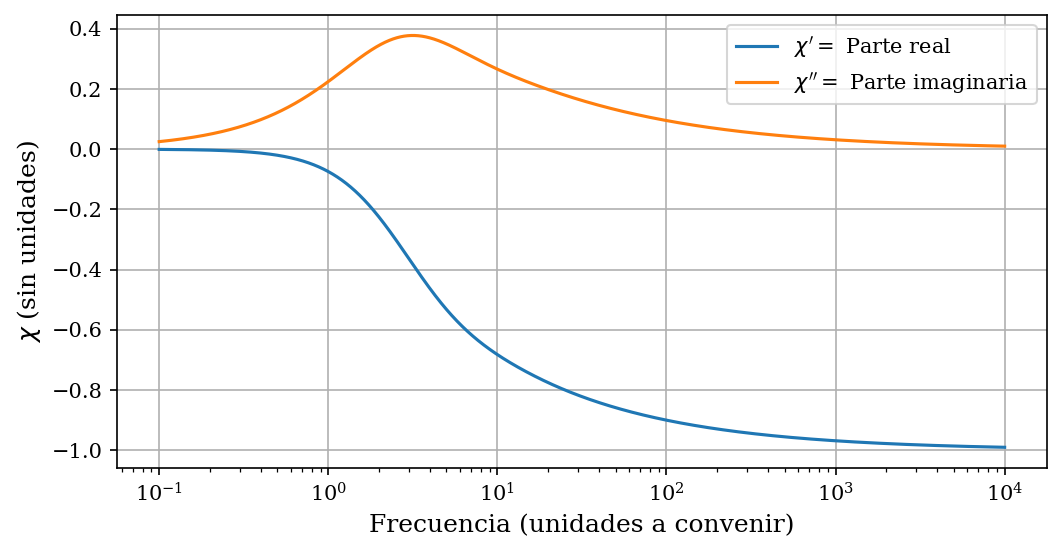

In [66]:
frec = np.logspace(-1,4,100000)
delta = 1/np.sqrt(frec)
k = (1+1j)/delta
suscep = 2*scipy.special.jv(1,k)/(k*scipy.special.jv(0,k))-1
plt.plot(frec,suscep.real, label = "$\chi^{\prime}=$ Parte real")
plt.plot(frec,suscep.imag, label = "$\chi^{\prime \prime}=$ Parte imaginaria")
plt.legend()
plt.xscale("log")
plt.xlabel("Frecuencia (unidades a convenir)")
plt.ylabel("$\chi$ (sin unidades)")
plt.show()

#Datos sin muestra

In [67]:
freq_sin_100 = np.load('Frecuencias sin muestra 1-100 Hz.npy')[7:]
chiprima_sin_100 = np.load('chi prima sin muestra 1-100 Hz.npy')[7:]
chisegunda_sin_100 = np.load('chi segunda sin muestra 1-100 Hz.npy')[7:]

freq_sin_10k =np.load('Frecuencias sin muestra 100-10kHz.npy')[1:] #Con este ultimo parentesis saco el primer elemento de esta lista, que es el de frecuencia 100 que seguro midio mejor el dato arriba
chiprima_sin_10k = np.load('chi prima sin muestra 100-10kHz.npy')[1:]
chisegunda_sin_10k = np.load('chi segunda sin muestra 100-10kHz.npy')[1:]

In [68]:
freq_sin = np.array(list(freq_sin_100)+list(freq_sin_10k))
chiprima_sin = np.array(list(chiprima_sin_100)+list(chiprima_sin_10k))
chisegunda_sin = np.array(list(chisegunda_sin_100)+list(chisegunda_sin_10k))

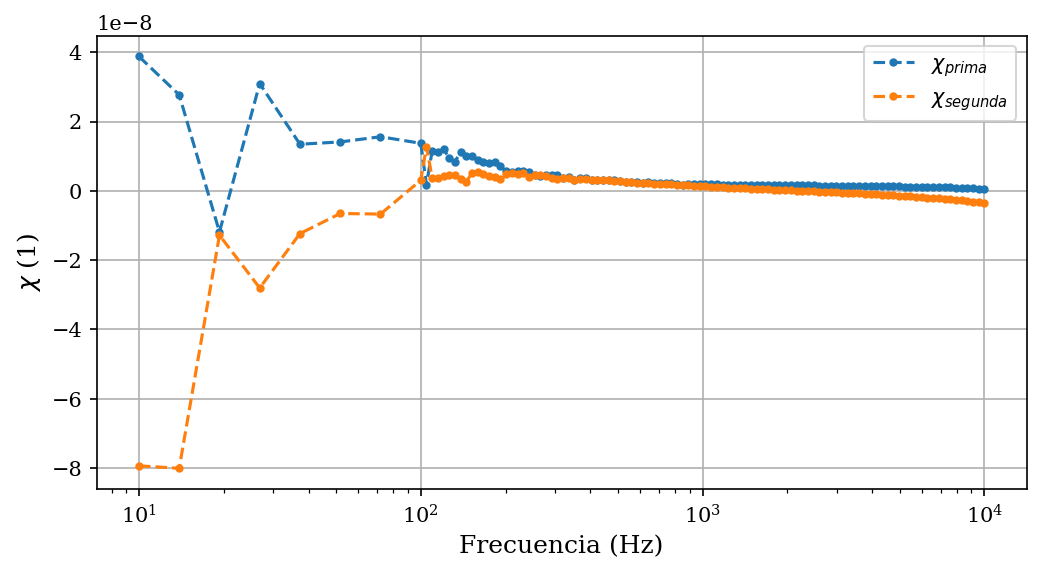

In [69]:
plt.figure()
plt.plot(freq_sin, chiprima_sin, '.--', label='$\chi_{prima}$')
plt.plot(freq_sin, chisegunda_sin, '.--', label='$\chi_{segunda}$')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$\chi$ (1)')
plt.show()

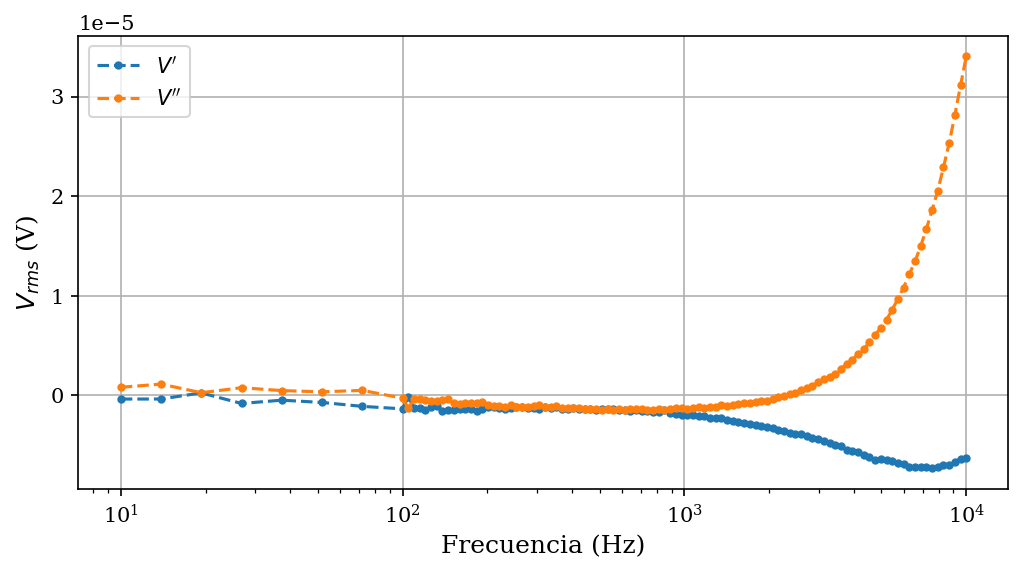

In [139]:
plt.figure()
plt.plot(freq_sin, -chiprima_sin*freq_sin, '.--', label='$V^{\prime}$')
plt.plot(freq_sin, -chisegunda_sin*freq_sin, '.--', label='$V^{\prime \prime}$')
plt.xscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$V_{rms}$ (V)')
plt.savefig("Caracterizacion secundarios profunda.png")
plt.show()

#Cobre C2

In [71]:
freq_c2_100 = np.load('Frecuencias con muestra 1-100 Hz.npy')[7:]
chiprima_c2_100 = np.load('chi prima con muestra 1-100 Hz.npy')[7:]
chisegunda_c2_100 = np.load('chi segunda con muestra 1-100 Hz.npy')[7:]

freq_c2_10k =np.load('Frecuencias con muestra 100-10kHz.npy')[1:] #Con este ultimo parentesis saco el primer elemento de esta lista, que es el de frecuencia 100 que seguro midio mejor el dato arriba
chiprima_c2_10k = np.load('chi prima con muestra 100-10kHz.npy')[1:]
chisegunda_c2_10k = np.load('chi segunda con muestra 100-10kHz.npy')[1:]

In [72]:
freq_c2 = np.array(list(freq_c2_100)+list(freq_c2_10k))
chiprima_c2 = np.array(list(chiprima_c2_100)+list(chiprima_c2_10k))
chisegunda_c2 = np.array(list(chisegunda_c2_100)+list(chisegunda_c2_10k))

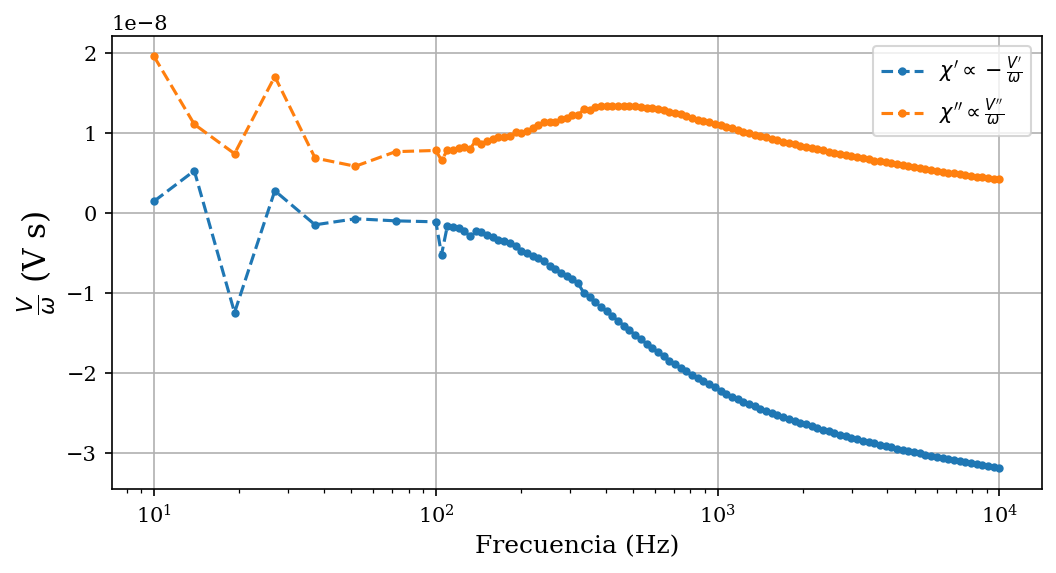

In [73]:
plt.figure()
plt.plot(freq_c2, -(chiprima_c2-chiprima_sin)/(2*np.pi), '.--', label=r'$\chi^{\prime} \propto -\frac{V^{\prime}}{\omega}$')
plt.plot(freq_c2, -(chisegunda_c2-chiprima_sin)/(2*np.pi), '.--', label=r'$\chi^{\prime \prime} \propto \frac{V^{\prime\prime}}{\omega}$')
#plt.plot(freq_c2, -chiprima_c2, '.--', label='$\chi_{prima}$ (sin fondo)')
#plt.plot(freq_c2, -chisegunda_c2, '.--', label='$\chi_{segunda}$ (sin fondo)')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel(r'$\frac{V}{\omega}$ (V s)', fontsize = 15)
plt.show()

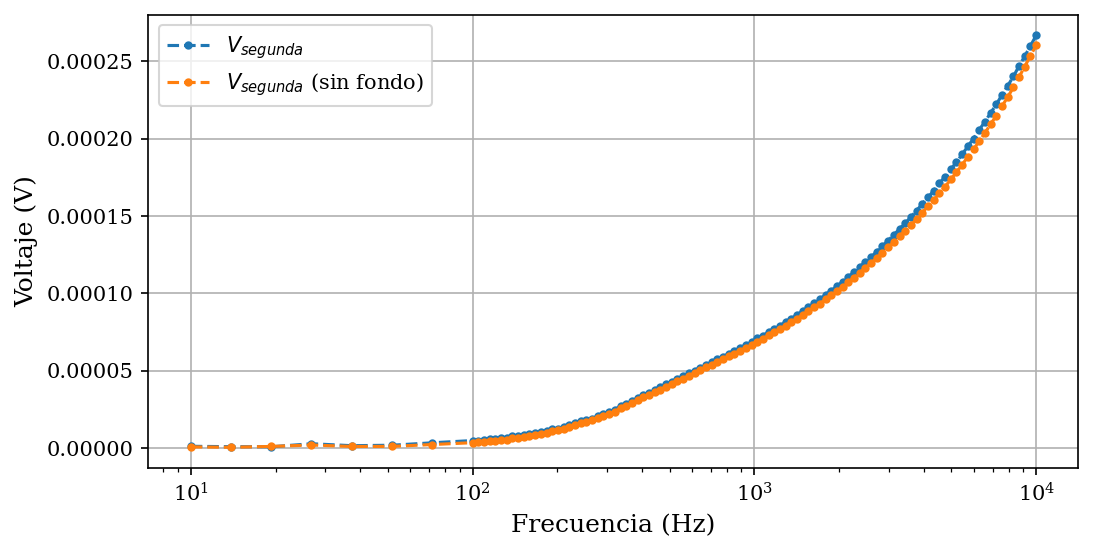

In [74]:
plt.figure()
#plt.plot(freq_c2, -(chiprima_c2-chiprima_sin)*freq_c2, '.--', label='$V_{prima}$')
plt.plot(freq_c2, -(chisegunda_c2-chiprima_sin)*freq_c2, '.--', label='$V_{segunda}$')
#plt.plot(freq_c2, -chiprima_c2*freq_c2, '.--', label='$V_{prima}$ (sin fondo)')
plt.plot(freq_c2, -chisegunda_c2*freq_c2, '.--', label='$V_{segunda}$ (sin fondo)')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel(r'Voltaje (V)')
plt.show()

In [75]:
chiprima_c2 = -(chiprima_c2-chiprima_sin)/(2*np.pi) #Las redefino por el valor posta restandole el fondo
chisegunda_c2 = -(chisegunda_c2-chiprima_sin)/(2*np.pi)

z_c2 = np.abs(chiprima_c2/chisegunda_c2)
z_en_rango = []
freq_z_c2 = []
i = 0
while  i < len(z_c2):
  if 0.1<z_c2[i]<2.5: #Dejamos solo los valores de z en el rango apropiado
    z_en_rango.append(z_c2[i])
    freq_z_c2.append(freq_c2[i])
  i = i + 1

z_c2 = np.array(z_en_rango)

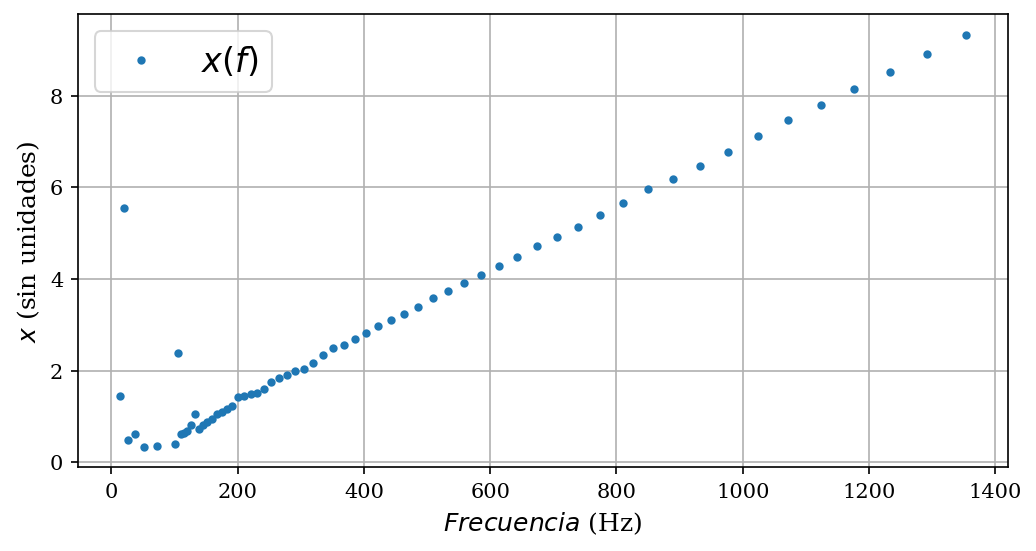

In [76]:
x_c2 = -0.01 + 3.06*z_c2 - 0.105*z_c2**2 + 0.167*z_c2**3

plt. figure()
plt.plot(freq_z_c2, x_c2, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (sin unidades)')
plt.show()

Como da muy mal al inicio, saco todos esos puntos.

In [77]:
z_c2 = np.abs(chiprima_c2/chisegunda_c2)
z_en_rango = []
freq_z_c2 = []
i = 0
while i < len(z_c2):
  if 4000 > freq_c2[i] > 300 and 0.1<z_c2[i]<2.5: #Aca los filtro, la cota superior esta al pedo, es por si se quiere cambiar
    z_en_rango.append(z_c2[i])
    freq_z_c2.append(freq_c2[i])
  i = i + 1

z_c2 = np.array(z_en_rango)
freq_z_c2 = np.array(freq_z_c2)

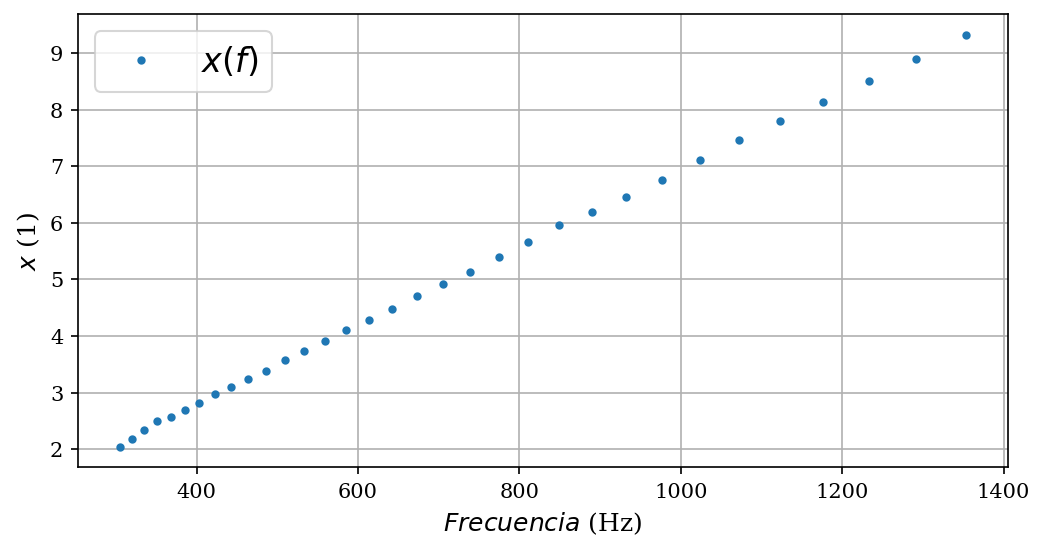

In [78]:
x_c2 = -0.01 + 3.06*z_c2 - 0.105*z_c2**2 + 0.167*z_c2**3

plt. figure()
plt.plot(freq_z_c2, x_c2, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')
plt.show()

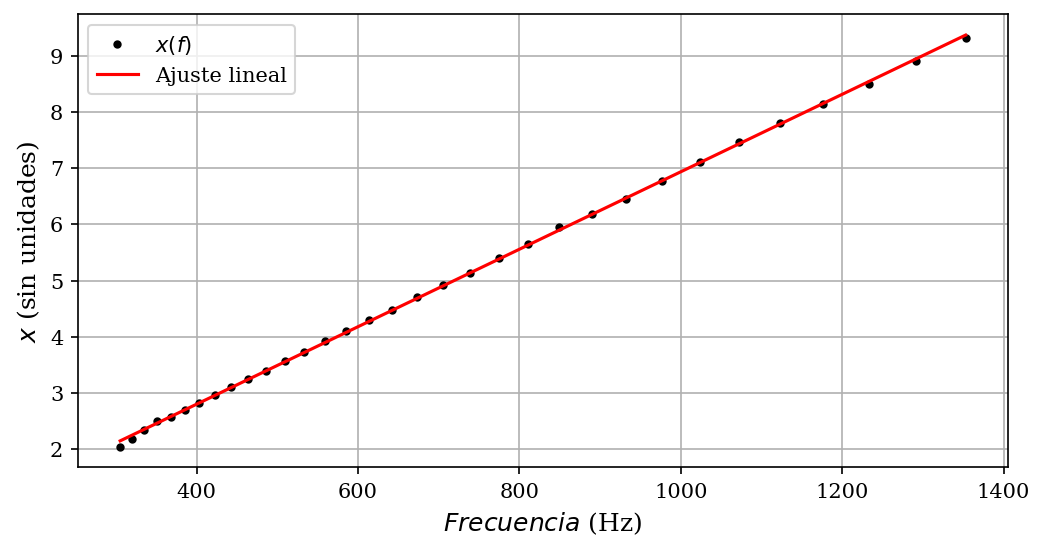

a: 0.006891719405313053 ± 1.8130324586278178e-05
b: 0.04248441744496892 ± 0.013990834735961797


In [79]:
var_x = freq_z_c2
var_y = x_c2

plt.plot(var_x, var_y, '.', label='$x(f)$', color = 'k')

def f_ajuste(x, a, b): 
    return a*x+b

popt, pcov = curve_fit(f_ajuste, var_x, var_y)#, absolute_sigma = True, sigma=err_var_y)
a, b = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste lineal')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (sin unidades)')


# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('ajuste_lineal.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b = np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')

Usando la ecuacion de x, que es

$$x = \frac{C r^2}{\rho} f$$

donde $\rho$ es la resistividad de la muestra, $r$ su radio y $C = 3.95.10 -6$. 

Con este ajuste calculamos $a = \frac{C r^2}{\rho}$, asi que hay que despejar para obtener $\rho$ y tenemos que propagar su error.

In [80]:
C =3.95e-6
r_c2 = (1.2/2)/100 #PONERLO EN METROS
a_c2 = a
rho_c2 = C*r_c2**2/a_c2

err_r_c2 = (0.003/2)/100
err_a_c2 = err_a

err_rho_c2 = C*np.sqrt((2*r_c2*err_r_c2/a_c2)**2+((err_a_c2*r_c2**2)/(a_c2**2))**2)


print("La resistividad es", rho_c2,"±",err_rho_c2, "Ω metro")


La resistividad es 2.063345757959521e-08 ± 1.1657592199033795e-10 Ω metro


In [81]:
err_rho_c2-0.011657592199033797e-8

-2.5849394142282115e-26

In [82]:
mu_0 = 4*np.pi*1e-7
delta_c2 = np.sqrt(2*rho_c2/(mu_0*2*np.pi*freq_z_c2))

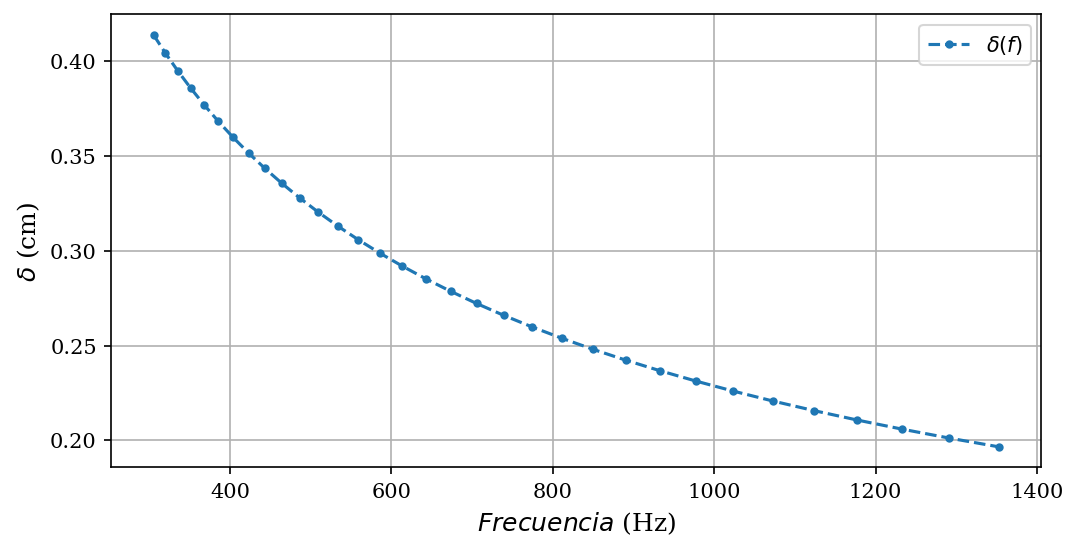

In [83]:
plt.plot(freq_z_c2,delta_c2*100,'.--', label = "$\delta (f)$")
plt.legend()
plt.xlabel("$Frecuencia$ (Hz)")
plt.ylabel("$\delta$ (cm)")
plt.show()

##Intento de 1 < x < 10

In [84]:
chiprima_c2 = -(chiprima_c2-chiprima_sin) #Las redefino por el valor posta restandole el fondo
chisegunda_c2 = -(chisegunda_c2-chiprima_sin)

z_c2 = np.abs(chiprima_c2/chisegunda_c2)
x_en_rango = []
freq_x_c2 = []
x_c2 = -0.01 + 3.06*z_c2 - 0.105*z_c2**2 + 0.167*z_c2**3

i = 0
while  i < len(x_c2):
  if 1<x_c2[i]<10: #Dejamos solo los valores de z en el rango apropiado
    x_en_rango.append(x_c2[i])
    freq_x_c2.append(freq_c2[i])
  i = i + 1

x_c2 = np.array(x_en_rango)

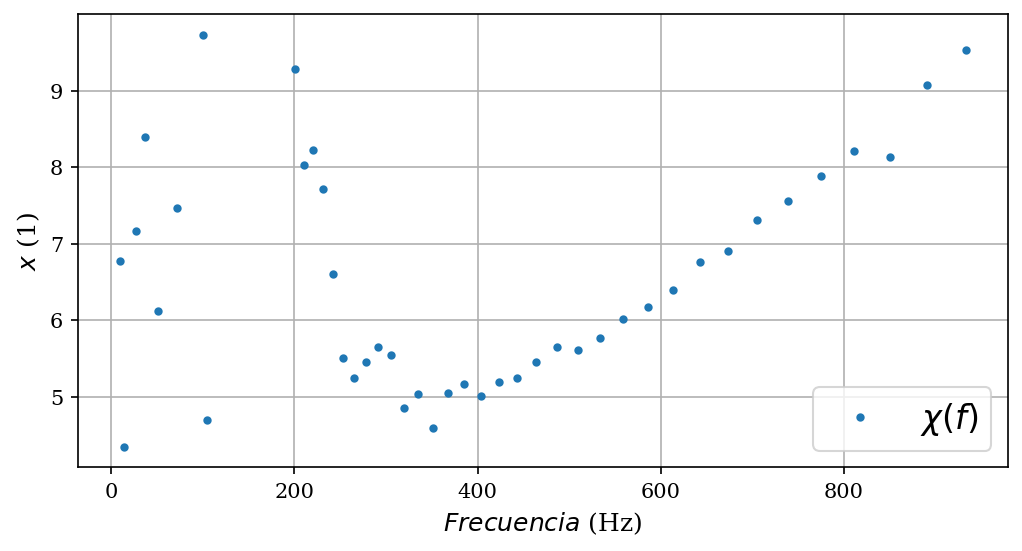

In [85]:
plt. figure()
plt.plot(freq_x_c2, x_c2, '.', label='$\chi(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')
plt.show()

Como da muy mal al inicio, saco todos esos puntos.

In [86]:
z_c2 = np.abs(chiprima_c2/chisegunda_c2)
x_en_rango = []
freq_x_c2 = []
x_c2 = -0.01 + 3.06*z_c2 - 0.105*z_c2**2 + 0.167*z_c2**3

i = 0
while  i < len(x_c2):
  if 1<x_c2[i]<10 and freq_c2[i] >230: #Dejamos solo los valores de z en el rango apropiado
    x_en_rango.append(x_c2[i])
    freq_x_c2.append(freq_c2[i])
  i = i + 1

x_c2 = np.array(x_en_rango)

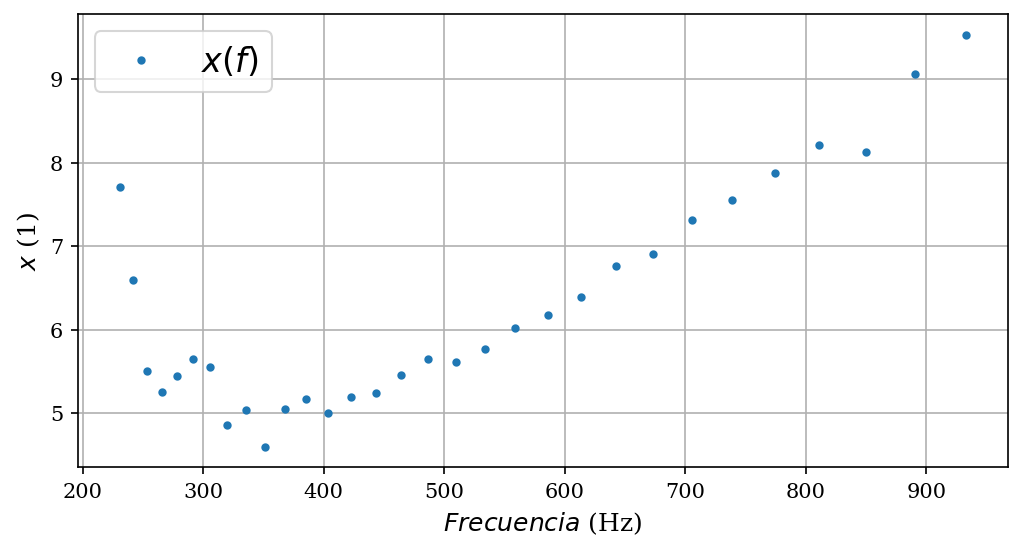

In [87]:
plt. figure()
plt.plot(freq_x_c2, x_c2, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')
plt.show()

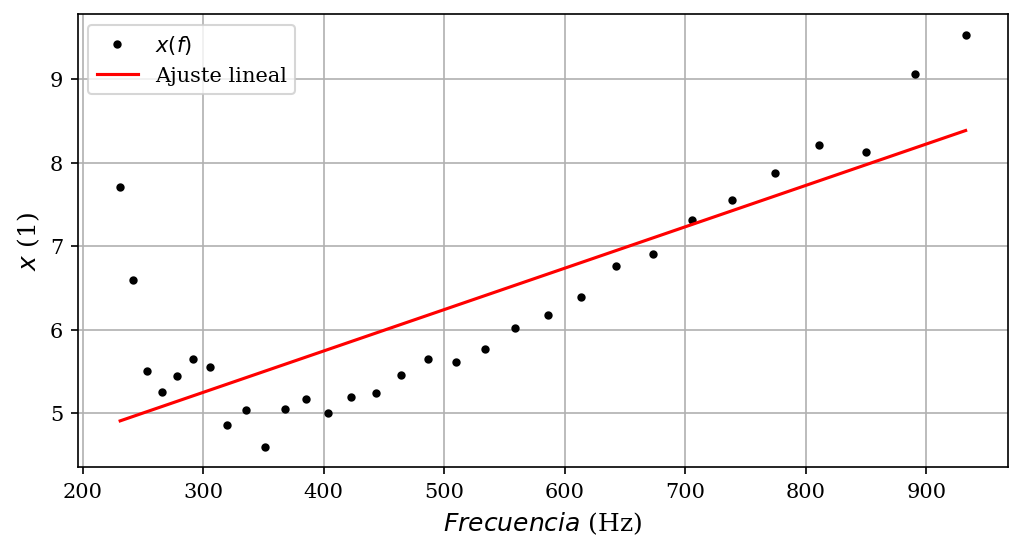

a: 0.004960095521338149 ± 0.0007060003693968515
b: 3.760607059622313 ± 0.3855055641673438


In [88]:
var_x = freq_x_c2
var_y = x_c2

plt.plot(var_x, var_y, '.', label='$x(f)$', color = 'k')

def f_ajuste(x, a, b): 
    return a*x+b

popt, pcov = curve_fit(f_ajuste, var_x, var_y)#, absolute_sigma = True, sigma=err_var_y)
a, b = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste lineal')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')


# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('ajuste_lineal.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b = np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')

Usando la ecuacion de x, que es

$$x = \frac{C r^2}{\rho} f$$

donde $\rho$ es la resistividad de la muestra, $r$ su radio y $C = 3.95.10 -6$. 

Con este ajuste calculamos $a = \frac{C r^2}{\rho}$, asi que hay que despejar para obtener $\rho$ y tenemos que propagar su error.

In [89]:
C =3.95e-6
r_c2 = (1.2/2)/100 #PONERLO EN METROS
a_c2_2 = a
rho_c2_2 = C*r_c2**2/a_c2_2

err_r_c2 = (0.003/2)/100
err_a_c2_2 = err_a

err_rho_c2_2 = C*np.sqrt((2*r_c2*err_r_c2/a_c2_2)**2+((err_a_c2_2*r_c2**2)/(a_c2_2**2))**2)


print("La resistividad es", rho_c2_2,"±",err_rho_c2_2, "Ω metro")


La resistividad es 2.8668802725322694e-08 ± 4.0831208652392e-09 Ω metro


#Cobre C3

In [143]:
freq_c3_100 = np.load('Frecuencias con muestra 1-100 Hz cu3.npy')[2:]
chiprima_c3_100 = np.load('chi prima con muestra 1-100 Hz cu3.npy')[2:]
chisegunda_c3_100 = np.load('chi segunda con muestra 1-100 Hz cu3.npy')[2:]

freq_c3_10k =np.load('Frecuencias con muestra 100-10kHz cu3.npy')[1:] #Con este ultimo parentesis saco el primer elemento de esta lista, que es el de frecuencia 100 que seguro midio mejor el dato arriba
chiprima_c3_10k = np.load('chi prima con muestra 100-10kHz cu3.npy')[1:]
chisegunda_c3_10k = np.load('chi segunda con muestra 100-10kHz cu3.npy')[1:]

In [144]:
freq_c3 = np.array(list(freq_c3_100[7:])+list(freq_c3_10k))
chiprima_c3 = np.array(list(chiprima_c3_100[7:])+list(chiprima_c3_10k))
chisegunda_c3 = np.array(list(chisegunda_c3_100[7:])+list(chisegunda_c3_10k))

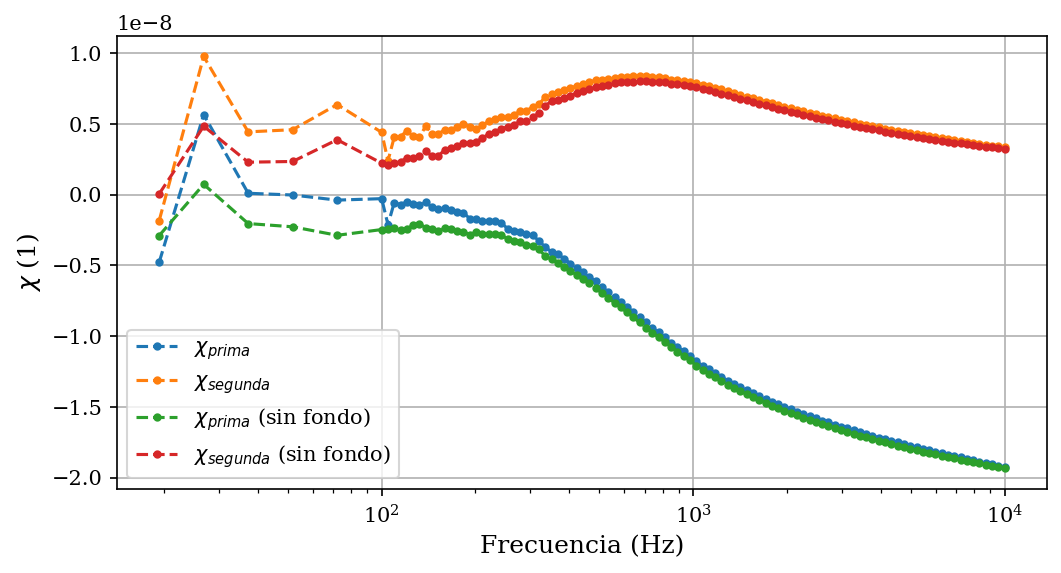

In [145]:
plt.figure()
plt.plot(freq_c3, -(chiprima_c3-chiprima_sin[2:])/(2*np.pi), '.--', label='$\chi_{prima}$')
plt.plot(freq_c3, -(chisegunda_c3-chiprima_sin[2:])/(2*np.pi), '.--', label='$\chi_{segunda}$')
plt.plot(freq_c3, -chiprima_c3/(2*np.pi), '.--', label='$\chi_{prima}$ (sin fondo)')
plt.plot(freq_c3, -chisegunda_c3/(2*np.pi), '.--', label='$\chi_{segunda}$ (sin fondo)')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$\chi$ (1)')
plt.show()

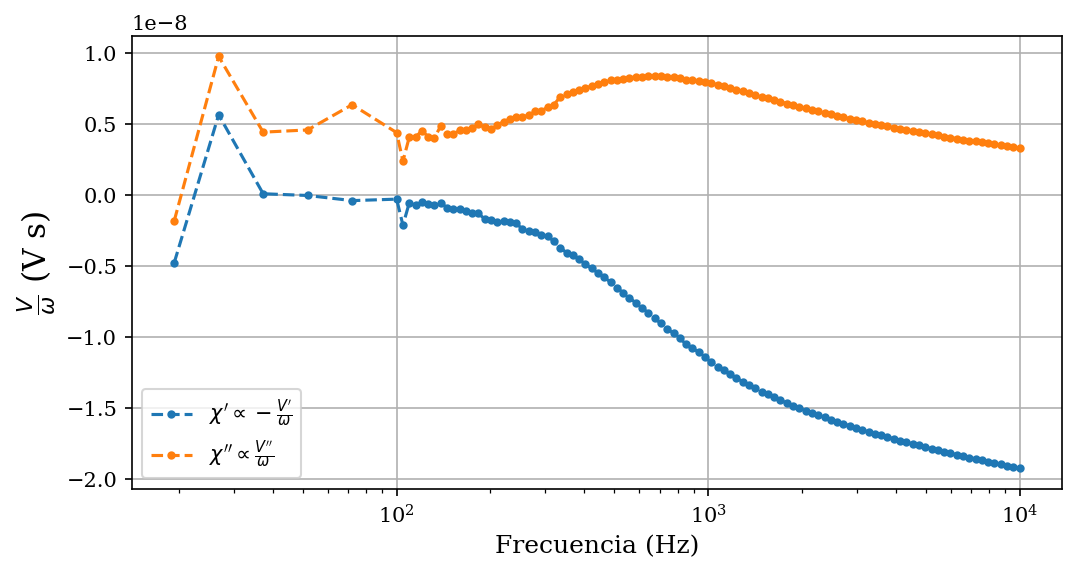

In [146]:
plt.figure()
plt.plot(freq_c3, -(chiprima_c3-chiprima_sin[2:])/(2*np.pi), '.--', label=r'$\chi^{\prime} \propto -\frac{V^{\prime}}{\omega}$')
plt.plot(freq_c3, -(chisegunda_c3-chiprima_sin[2:])/(2*np.pi), '.--', label=r'$\chi^{\prime \prime} \propto \frac{V^{\prime\prime}}{\omega}$')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel(r'$\frac{V}{\omega}$ (V s)', fontsize = 15)
plt.show()

In [148]:
chiprima_c3 = -(chiprima_c3-chiprima_sin[2:])/(2*np.pi)
chisegunda_c3 = -(chisegunda_c3-chiprima_sin[2:])/(2*np.pi)

z_c3 = np.abs(chiprima_c3/chisegunda_c3)
z_en_rango = []
freq_z_c3 = []
i = 0
while i < len(z_c3): #Dejamos solo los valores de z en el rango apropiado
  if 0.1<z_c3[i]<2.5:
    z_en_rango.append(z_c3[i])
    freq_z_c3.append(freq_c3[i])
  i = i + 1

z_c3 = np.array(z_en_rango)

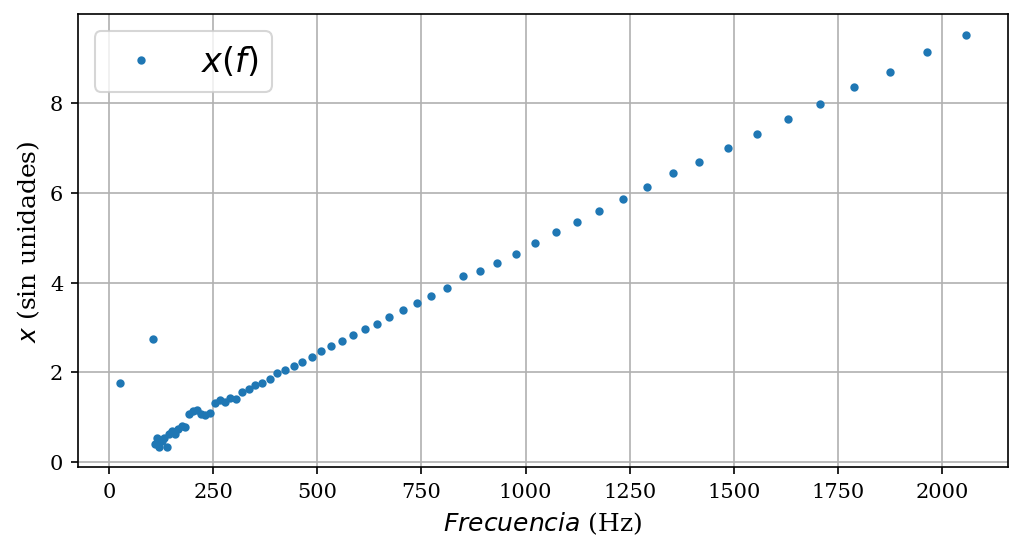

In [149]:
x_c3 = -0.01 + 3.06*z_c3 - 0.105*z_c3**2 + 0.167*z_c3**3

plt. figure()
plt.plot(freq_z_c3, x_c3, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (sin unidades)')
plt.show()

Como da muy mal al inicio, saco todos esos puntos.

In [151]:
z_c3 = np.abs(chiprima_c3/chisegunda_c3)
z_en_rango = []
freq_z_c3 = []
i = 0
while i < len(z_c3):
  if 4000 > freq_c3[i] > 300 and 0.1 <z_c3[i]< 2.5: #Aca los filtro, la cota superior esta al pedo, es por si se quiere cambiar
    z_en_rango.append(z_c3[i])
    freq_z_c3.append(freq_c3[i])
  i = i + 1

z_c3 = np.array(z_en_rango)
freq_z_c3 = np.array(freq_z_c3)

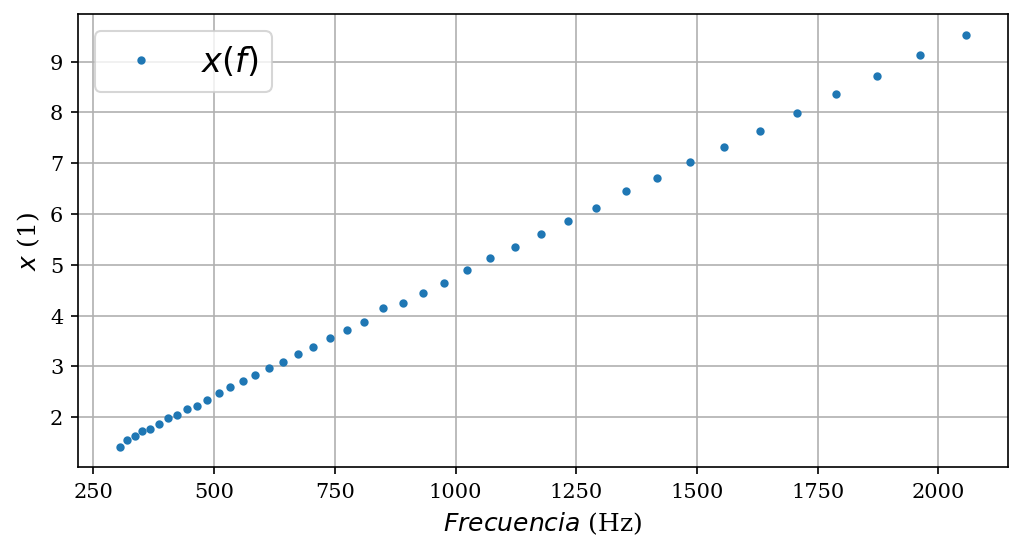

In [152]:
x_c3 = -0.01 + 3.06*z_c3 - 0.105*z_c3**2 + 0.167*z_c3**3

plt. figure()
plt.plot(freq_z_c3, x_c3, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')
plt.show()

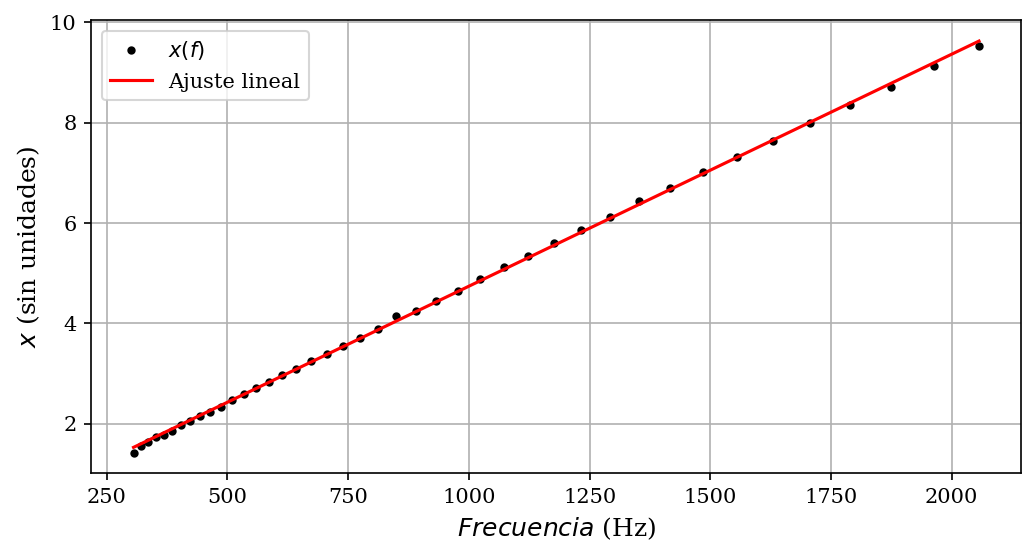

a: 0.004626607060280034 ± 1.2971369683489138e-05
b: 0.11133895374532045 ± 0.013670597743478558


In [153]:
var_x = freq_z_c3
var_y = x_c3

plt.plot(var_x, var_y, '.', label='$x(f)$', color = 'k')

def f_ajuste(x, a, b): 
    return a*x+b

popt, pcov = curve_fit(f_ajuste, var_x, var_y)#, absolute_sigma = True, sigma=err_var_y)
a, b = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste lineal')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (sin unidades)')


# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('ajuste_lineal.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b = np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')

Usando la ecuacion de x, que es

$$x = \frac{C r^2}{\rho} f$$

donde $\rho$ es la resistividad de la muestra, $r$ su radio y $C = 3.95.10 -6$. 

Con este ajuste calculamos $a = \frac{C r^2}{\rho}$, asi que hay que despejar para obtener $\rho$ y tenemos que propagar su error.

In [99]:
C =3.95e-6
r_c3 = (0.954/2)/100 #PONERLO EN METROS
a_c3 = a
rho_c3 = C*r_c3**2/a_c3

err_r_c3 = (0.0002/2)/100
err_a_c3 = err_a

err_rho_c3 = C*np.sqrt((2*r_c3*err_r_c3/a_c3)**2+((err_a_c3*r_c3**2)/(a_c3**2))**2)


print("La resistividad es", rho_c3,"±",err_rho_c3, "Ω metro")

La resistividad es 1.9425456674628473e-08 ± 5.506777522224828e-11 Ω metro


In [100]:
mu_0 = 4*np.pi*1e-7
delta_c3 = np.sqrt(2*rho_c3/(mu_0*2*np.pi*freq_z_c3))

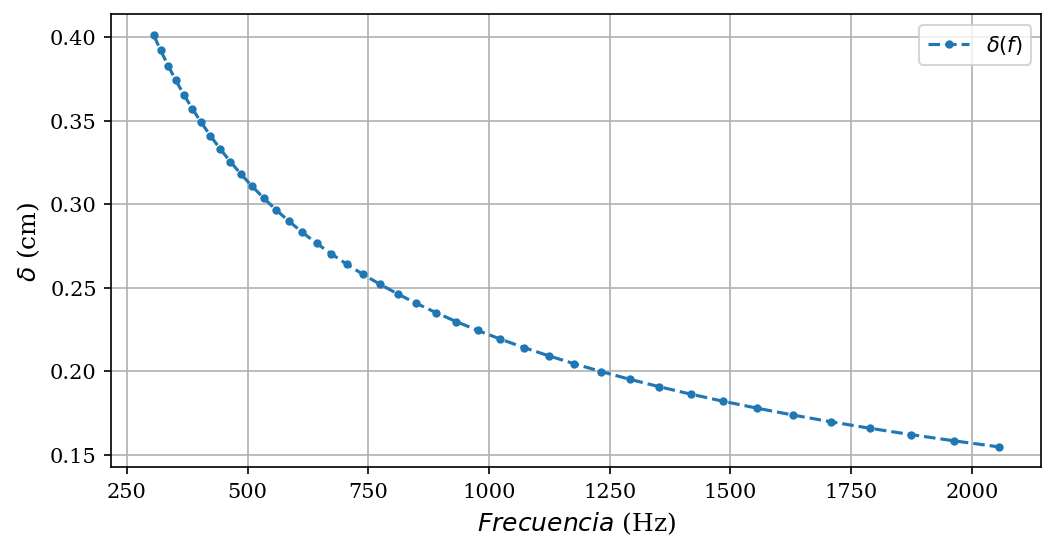

In [101]:
plt.plot(freq_z_c3,delta_c3*100,'.--', label = "$\delta (f)$")
#plt.plot(freq_z_c2,delta_c2*100,".--",label = "Cobre C2")
plt.legend()
plt.xlabel("$Frecuencia$ (Hz)")
plt.ylabel("$\delta$ (cm)")
plt.show()

#Laton

In [158]:
freq_lat_100 = (np.load('Frecuencias con muestra 1-100 Hz lat.npy')[7:])
chiprima_lat_100 = (np.load('chi prima con muestra 1-100 Hz lat.npy')[7:])
chisegunda_lat_100 = (np.load('chi segunda con muestra 1-100 Hz lat.npy')[7:])

freq_lat_10k =np.load('Frecuencias con muestra 100-10kHz lat.npy')[1:] #Con este ultimo parentesis saco el primer elemento de esta lista, que es el de frecuencia 100 que seguro midio mejor el dato arriba
chiprima_lat_10k = np.load('chi prima con muestra 100-10kHz lat.npy')[1:]
chisegunda_lat_10k = np.load('chi segunda con muestra 100-10kHz lat.npy')[1:]

In [159]:
freq_lat = np.array(list(freq_lat_100)+list(freq_lat_10k))
chiprima_lat = np.array(list(chiprima_lat_100)+list(chiprima_lat_10k))
chisegunda_lat = np.array(list(chisegunda_lat_100)+list(chisegunda_lat_10k))

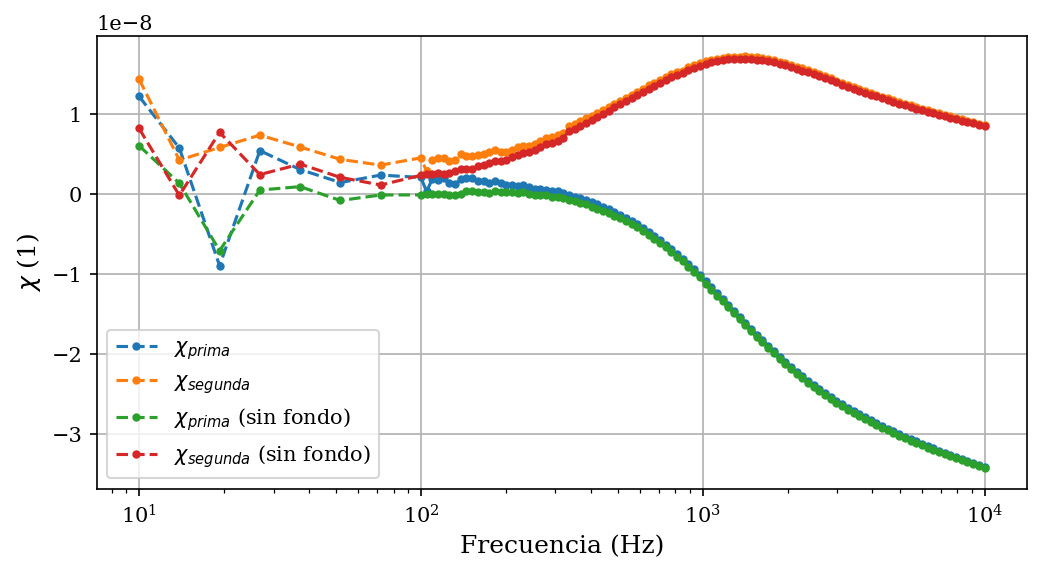

In [161]:
plt.figure()
plt.plot(freq_lat, -(chiprima_lat-chiprima_sin[0:])/(2*np.pi), '.--', label='$\chi_{prima}$')
plt.plot(freq_lat, -(chisegunda_lat-chiprima_sin[0:])/(2*np.pi), '.--', label='$\chi_{segunda}$')
plt.plot(freq_lat, -chiprima_lat/(2*np.pi), '.--', label='$\chi_{prima}$ (sin fondo)')
plt.plot(freq_lat, -chisegunda_lat/(2*np.pi), '.--', label='$\chi_{segunda}$ (sin fondo)')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$\chi$ (1)')
plt.show()

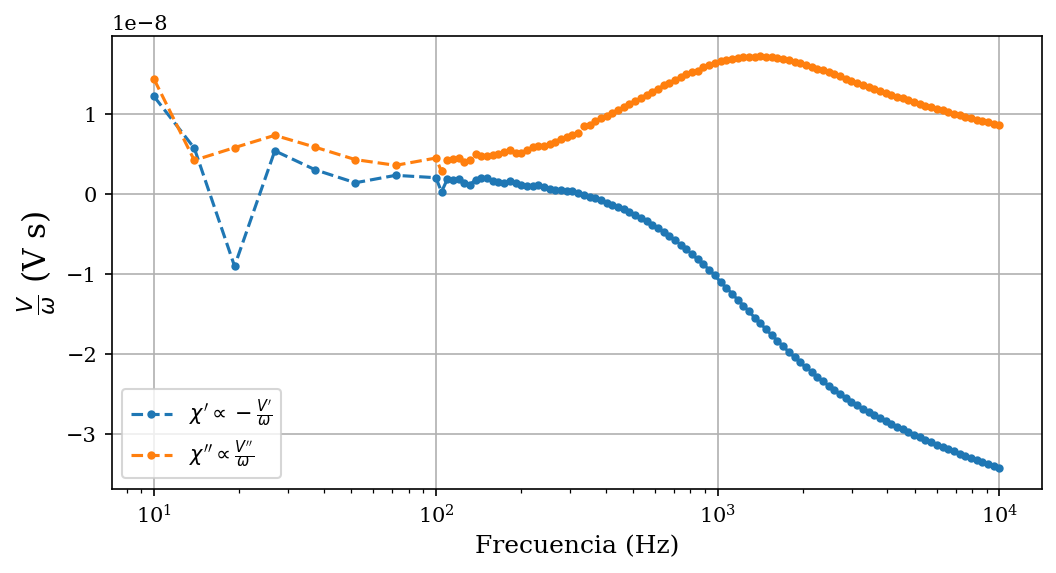

In [162]:
plt.figure()
plt.plot(freq_lat, -(chiprima_lat-chiprima_sin)/(2*np.pi), '.--', label=r'$\chi^{\prime} \propto -\frac{V^{\prime}}{\omega}$')
plt.plot(freq_lat, -(chisegunda_lat-chiprima_sin)/(2*np.pi), '.--', label=r'$\chi^{\prime \prime} \propto \frac{V^{\prime\prime}}{\omega}$')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel(r'$\frac{V}{\omega}$ (V s)', fontsize = 15)
plt.show()

In [106]:
chiprima_lat = -(chiprima_lat-chiprima_sin)
chisegunda_lat = -(chisegunda_lat-chiprima_sin)

z_lat = np.abs(chiprima_lat/chisegunda_lat)
z_en_rango = []
freq_z_lat = []
i = 0
while i < len(z_lat): #Dejamos solo los valores de z en el rango apropiado
  if 0.1<z_lat[i]<2.5:
    z_en_rango.append(z_lat[i])
    freq_z_lat.append(freq_lat[i])
  i = i + 1

z_lat = np.array(z_en_rango)

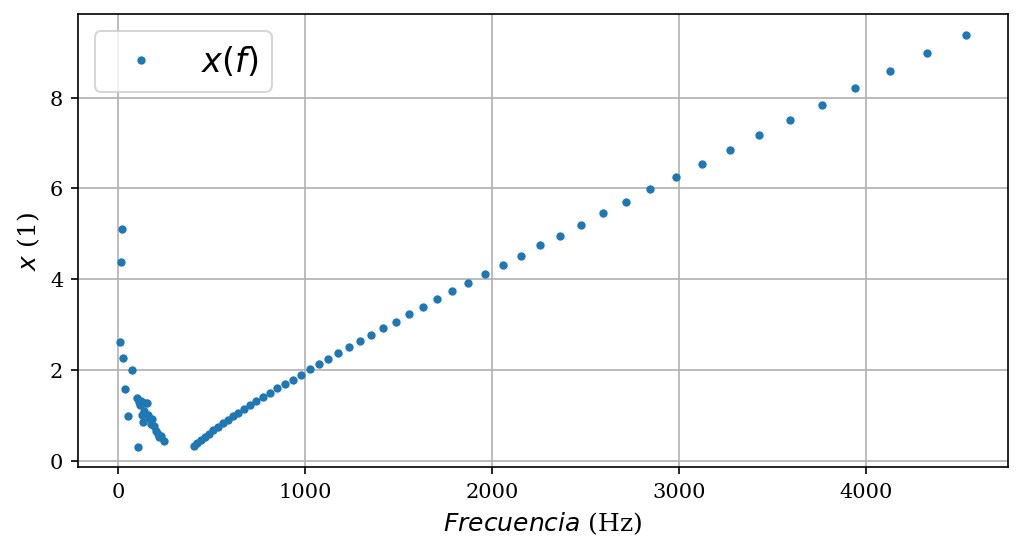

In [107]:
x_lat = -0.01 + 3.06*z_lat - 0.105*z_lat**2 + 0.167*z_lat**3

plt. figure()
plt.plot(freq_z_lat, x_lat, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')
plt.show()

Como da muy mal al inicio, saco todos esos puntos.

In [108]:
z_lat = np.abs(chiprima_lat/chisegunda_lat)
z_en_rango = []
freq_z_lat = []
i = 0
while i < len(z_lat):
  if 4000 > freq_lat[i] > 500 and 0.1 <z_lat[i]< 2.5: #Aca los filtro, la cota superior esta al pedo, es por si se quiere cambiar
    z_en_rango.append(z_lat[i])
    freq_z_lat.append(freq_lat[i])
  i = i + 1

z_lat = np.array(z_en_rango)
freq_z_lat = np.array(freq_z_lat)

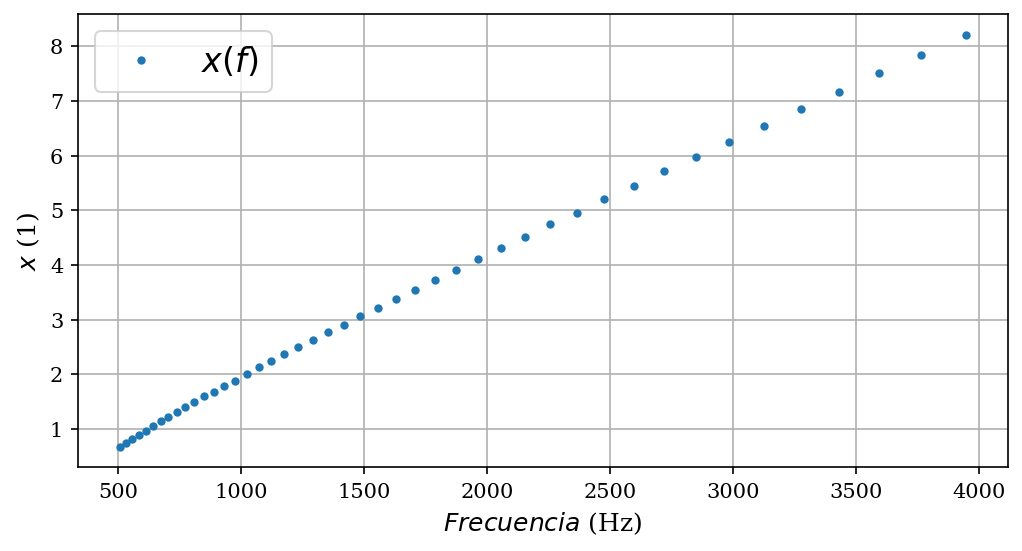

In [109]:
x_lat = -0.01 + 3.06*z_lat - 0.105*z_lat**2 + 0.167*z_lat**3

plt. figure()
plt.plot(freq_z_lat, x_lat, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')
plt.show()

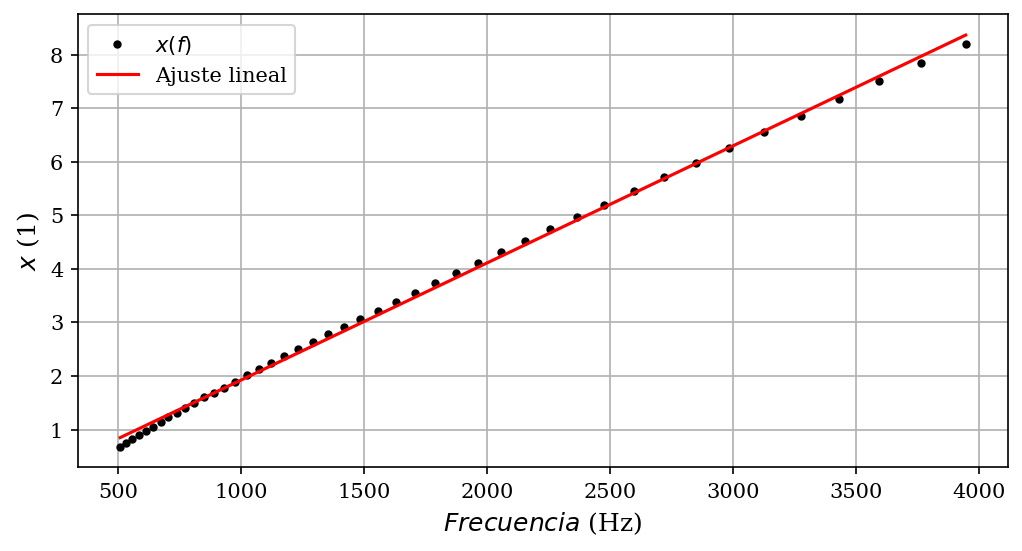

a: 0.002187518272406964 ± 1.2128490721144668e-05
b: -0.2645544856569546 ± 0.023743065512458604


In [110]:
var_x = freq_z_lat
var_y = x_lat

plt.plot(var_x, var_y, '.', label='$x(f)$', color = 'k')

def f_ajuste(x, a, b): 
    return a*x+b

popt, pcov = curve_fit(f_ajuste, var_x, var_y)#, absolute_sigma = True, sigma=err_var_y)
a, b = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste lineal')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')


# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('ajuste_lineal.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b = np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')

Usando la ecuacion de x, que es

$$x = \frac{C r^2}{\rho} f$$

donde $\rho$ es la resistividad de la muestra, $r$ su radio y $C = 3.95.10 -6$. 

Con este ajuste calculamos $a = \frac{C r^2}{\rho}$, asi que hay que despejar para obtener $\rho$ y tenemos que propagar su error.

In [111]:
C =3.95e-6
r_lat = (1.312/2)/100 #PONERLO EN METROS
a_lat = a
rho_lat = C*r_lat**2/a_lat

err_r_lat = (0.001/2)/100
err_a_lat = err_a

err_rho_lat = C*np.sqrt((2*r_lat*err_r_lat/a_lat)**2+((err_a_lat*r_lat**2)/(a_lat**2))**2)


print("La resistividad es", rho_lat,"±",err_rho_lat, "Ω metro")

La resistividad es 7.770573720189551e-08 ± 4.468195434693776e-10 Ω metro


In [112]:
mu_0 = 4*np.pi*1e-7
delta_lat = np.sqrt(2*rho_lat/(mu_0*2*np.pi*freq_z_lat))

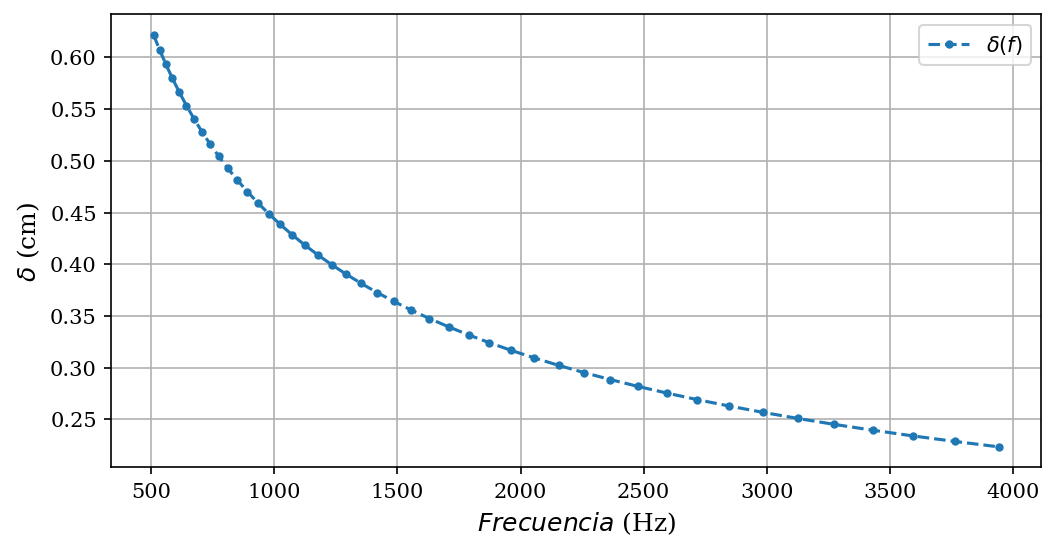

In [113]:
plt.plot(freq_z_lat,delta_lat*100,'.--', label = "$\delta (f)$")
plt.legend()
plt.xlabel("$Frecuencia$ (Hz)")
plt.ylabel("$\delta$ (cm)")
plt.show()

#Aluminio

In [163]:
freq_al_100 = np.load('Frecuencias con muestra 1-100 Hz al.npy')[7:]
chiprima_al_100 = np.load('chi prima con muestra 1-100 Hz al.npy')[7:]
chisegunda_al_100 = np.load('chi segunda con muestra 1-100 Hz al.npy')[7:]

freq_al_10k =np.load('Frecuencias con muestra 100-10kHz al.npy')[1:] #Con este ultimo parentesis saco el primer elemento de esta lista, que es el de frecuencia 100 que seguro midio mejor el dato arriba
chiprima_al_10k = np.load('chi prima con muestra 100-10kHz al.npy')[1:]
chisegunda_al_10k = np.load('chi segunda con muestra 100-10kHz al.npy')[1:]

In [164]:
freq_al = np.array(list(freq_al_100)+list(freq_al_10k))[0:]
chiprima_al = np.array(list(chiprima_al_100)+list(chiprima_al_10k))
chisegunda_al = np.array(list(chisegunda_al_100)+list(chisegunda_al_10k))

In [165]:
freq_sin_100 = np.load('Frecuencias sin muestra 1-100 Hz.npy')
chiprima_sin_100 = np.load('chi prima sin muestra 1-100 Hz.npy')
chisegunda_sin_100 = np.load('chi segunda sin muestra 1-100 Hz.npy')

freq_sin_10k =np.load('Frecuencias sin muestra 100-10kHz.npy')[1:] #Con este ultimo parentesis saco el primer elemento de esta lista, que es el de frecuencia 100 que seguro midio mejor el dato arriba
chiprima_sin_10k = np.load('chi prima sin muestra 100-10kHz.npy')[1:]
chisegunda_sin_10k = np.load('chi segunda sin muestra 100-10kHz.npy')[1:]

In [166]:
freq_sin = np.array(list(freq_sin_100)+list(freq_sin_10k))[7:]
chiprima_sin = np.array(list(chiprima_sin_100)+list(chiprima_sin_10k))[7:]
chisegunda_sin = np.array(list(chisegunda_sin_100)+list(chisegunda_sin_10k))[7:]

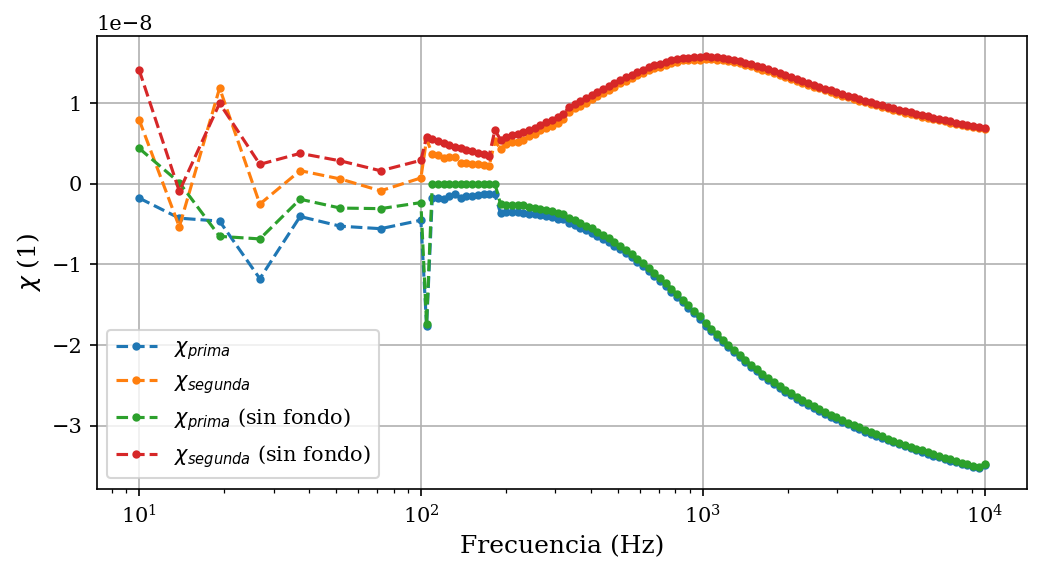

In [167]:
plt.figure()
plt.plot(freq_al, (-chiprima_al-chiprima_sin[0:])/(2*np.pi), '.--', label='$\chi_{prima}$')
plt.plot(freq_al, (-chisegunda_al-chiprima_sin[0:])/(2*np.pi), '.--', label='$\chi_{segunda}$')
plt.plot(freq_al, -chiprima_al/(2*np.pi), '.--', label='$\chi_{prima}$ (sin fondo)')
plt.plot(freq_al, -chisegunda_al/(2*np.pi), '.--', label='$\chi_{segunda}$ (sin fondo)')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$\chi$ (1)')
plt.show()

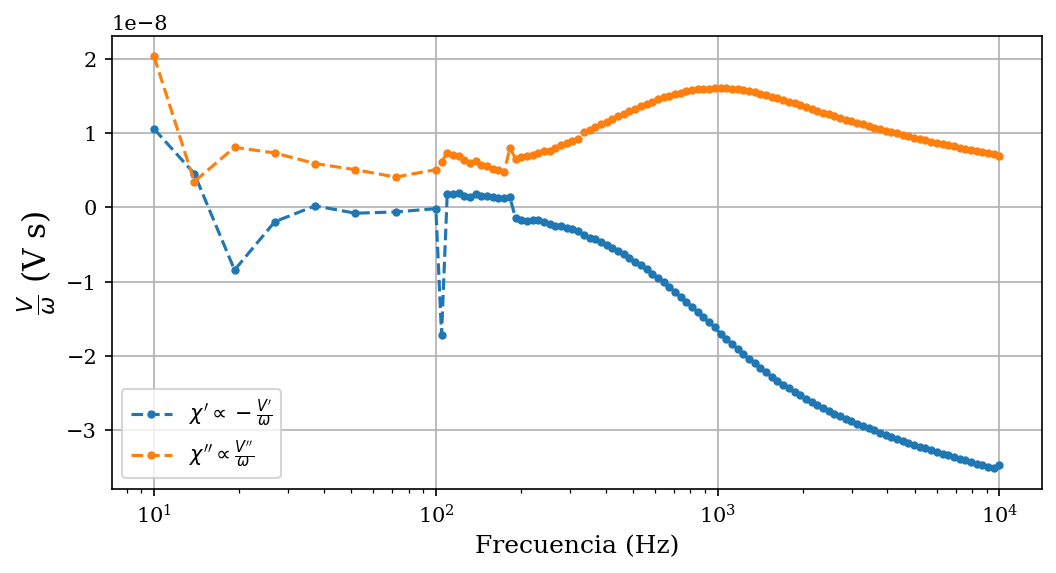

In [168]:
plt.figure()
plt.plot(freq_al, -(chiprima_al-chiprima_sin)/(2*np.pi), '.--', label=r'$\chi^{\prime} \propto -\frac{V^{\prime}}{\omega}$')
plt.plot(freq_al, -(chisegunda_al-chiprima_sin)/(2*np.pi), '.--', label=r'$\chi^{\prime \prime} \propto \frac{V^{\prime\prime}}{\omega}$')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel(r'$\frac{V}{\omega}$ (V s)', fontsize = 15)
plt.show()

In [169]:
chiprima_al = -(chiprima_al-chiprima_sin)/(2*np.pi)
chisegunda_al = -(chisegunda_al-chiprima_sin)/(2*np.pi)

z_al = np.abs(chiprima_al/chisegunda_al)
z_en_rango = []
freq_z_al = []
i = 0
while i < len(z_al): #Dejamos solo los valores de z en el rango apropiado
  if 0.1<z_al[i]<2.5:
    z_en_rango.append(z_al[i])
    freq_z_al.append(freq_al[i])
  i = i + 1

z_al = np.array(z_en_rango)

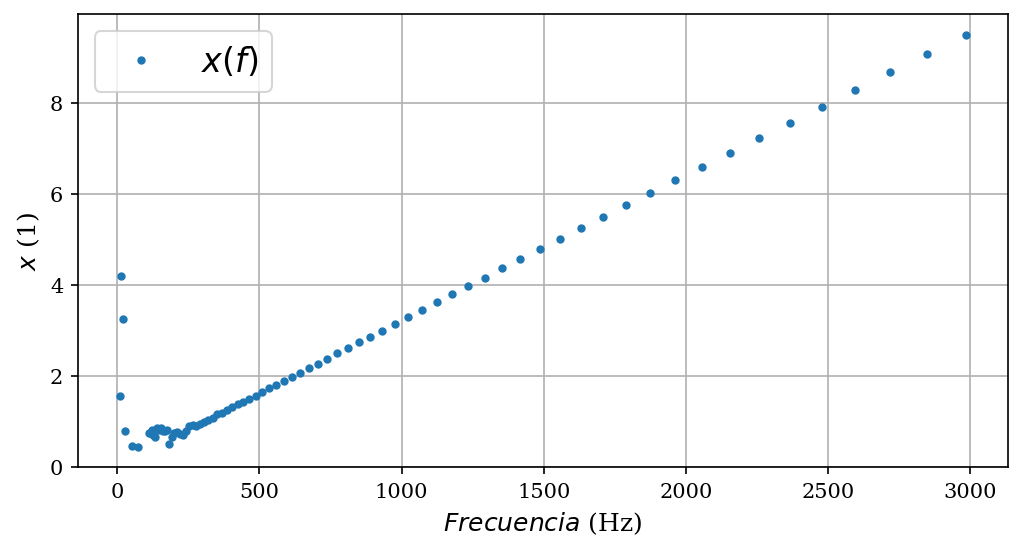

In [170]:
x_al = -0.01 + 3.06*z_al - 0.105*z_al**2 + 0.167*z_al**3

plt. figure()
plt.plot(freq_z_al, x_al, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')
plt.show()

Como da muy mal al inicio, saco todos esos puntos.

In [121]:
z_al = np.abs(chiprima_al/chisegunda_al)
z_en_rango = []
freq_z_al = []
i = 0
while i < len(z_al):
  if 4000 > freq_al[i] > 400 and 0.1 <z_al[i]< 2.5: #Aca los filtro, la cota superior esta al pedo, es por si se quiere cambiar
    z_en_rango.append(z_al[i])
    freq_z_al.append(freq_al[i])
  i = i + 1

z_al = np.array(z_en_rango)
freq_z_al = np.array(freq_z_al)

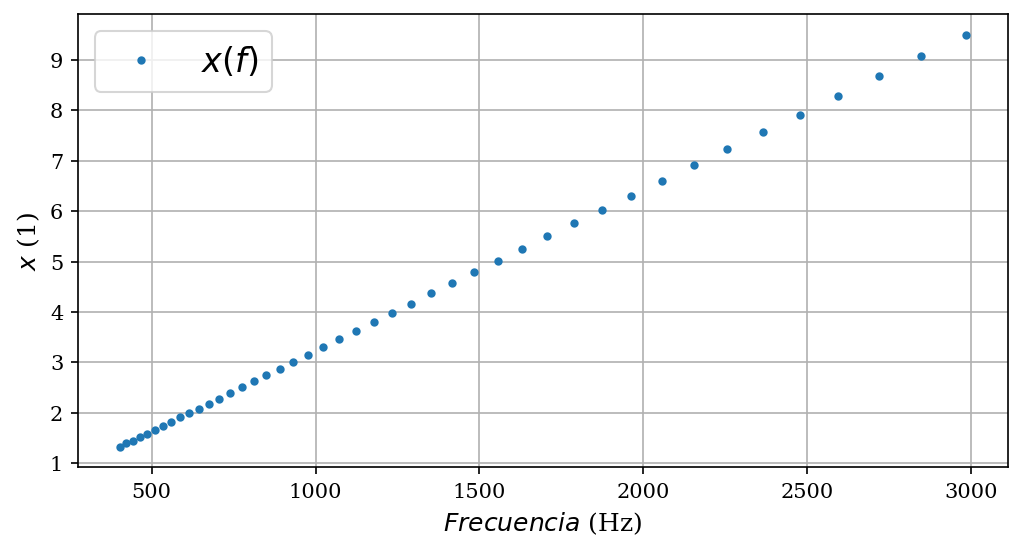

In [122]:
x_al = -0.01 + 3.06*z_al - 0.105*z_al**2 + 0.167*z_al**3

plt. figure()
plt.plot(freq_z_al, x_al, '.', label='$x(f)$')

plt.legend(fontsize = 16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')
plt.show()

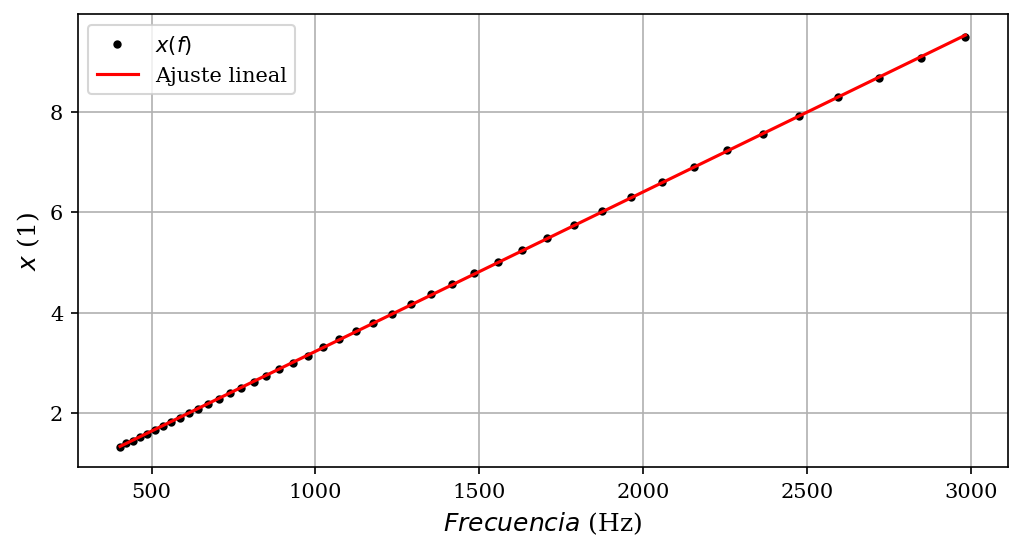

a: 0.0031831024561075867 ± 2.981402103337078e-06
b: 0.042670459735324934 ± 0.004461608510601476


In [123]:
var_x = freq_z_al
var_y = x_al

plt.plot(var_x, var_y, '.', label='$x(f)$', color = 'k')

def f_ajuste(x, a, b): 
    return a*x+b

popt, pcov = curve_fit(f_ajuste, var_x, var_y)#, absolute_sigma = True, sigma=err_var_y)
a, b = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste lineal')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel('$Frecuencia$ (Hz)')
plt.ylabel('$x$ (1)')


# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('ajuste_lineal.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b = np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')

Usando la ecuacion de x, que es

$$x = \frac{C r^2}{\rho} f$$

donde $\rho$ es la resistividad de la muestra, $r$ su radio y $C = 3.95.10 -6$. 

Con este ajuste calculamos $a = \frac{C r^2}{\rho}$, asi que hay que despejar para obtener $\rho$ y tenemos que propagar su error.

In [129]:
C =3.95e-6
r_al = (1.304/2)/100 #PONERLO EN METROS
a_al = a
rho_al = (C*(r_al**2))/a_al

err_r_al = (0.004/2)/100
err_a_al = err_a

err_rho_al = C*np.sqrt((2*r_al*err_r_al/a_al)**2+((err_a_al*r_al**2)/(a_al**2))**2)


print("La resistividad es", rho_al,"±",err_rho_al, "Ω metro")

La resistividad es 5.275233276824332e-08 ± 3.2738393496462445e-10 Ω metro


In [125]:
mu_0 = 4*np.pi*1e-7
delta_al = np.sqrt(2*rho_al/(mu_0*2*np.pi*freq_z_al))

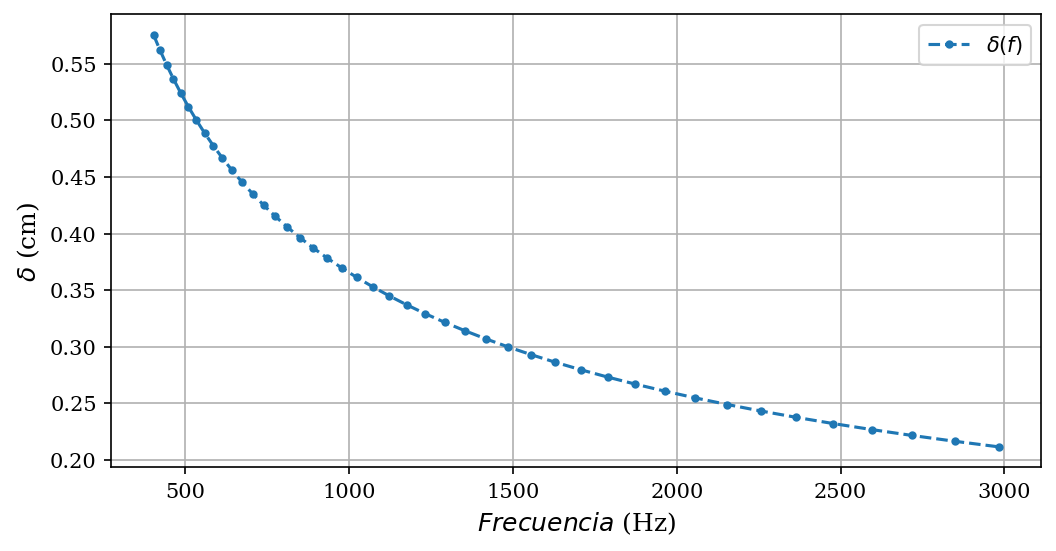

In [126]:
plt.plot(freq_z_al,delta_al*100,'.--', label = "$\delta (f)$")
plt.legend()
plt.xlabel("$Frecuencia$ (Hz)")
plt.ylabel("$\delta$ (cm)")
plt.show()

##Skin depth todos

In [136]:
frecuencias = np.logspace(1,4, 10000)
delta_c2 = np.sqrt(2*rho_c2/(mu_0*2*np.pi*frecuencias))
delta_c3 = np.sqrt(2*rho_c3/(mu_0*2*np.pi*frecuencias))
delta_lat = np.sqrt(2*rho_lat/(mu_0*2*np.pi*frecuencias))
delta_al = np.sqrt(2*rho_al/(mu_0*2*np.pi*frecuencias))

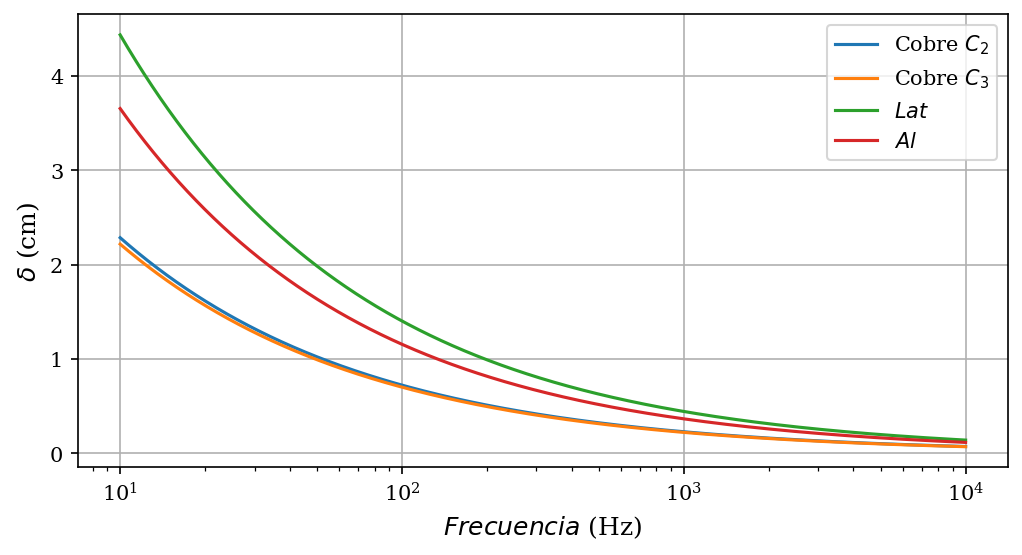

In [137]:
plt.plot(frecuencias,(delta_c2*100), label = "Cobre $C_2$")
plt.plot(frecuencias,(delta_c3*100), label = "Cobre $C_3$")
plt.plot(frecuencias,(delta_lat*100), label = "$Lat$")
plt.plot(frecuencias,(delta_al*100), label = "$Al$")
plt.legend()
plt.xscale("log")
plt.xlabel("$Frecuencia$ (Hz)")
plt.ylabel("$\delta$ (cm)")
plt.savefig("")
plt.show()